# Analiza danych #2. Badanie zależności między elementami pogody

### Pomiary meteorologiczne prowadzone są od stuleci. W miarę rozwoju techniki, kiedy powstawały takie urządzenia takie jak barometr czy anemometr szybko zostały one wykorzystane do mierzenia elementów pogody. Dzięki temu to, co przedtem opisywano głównie słownie teraz dało się wyrazić poprzez liczbę. Na podstawie dokonywanych pomiarów starano się przewidywać zmiany warunków atmosferycznych jak również obserwować statystyczne zależności wśród badanych zjawisk. Wraz z pojawieniem się komputerów rozwinęły się również możliwości modelowania zjawisk pogodowych w oparciu o zmierzone wartości, które służyły jako warunki brzegowe i początkowe dla równań różniczkowych opisujących to, co dzieje się w atmosferze. Komputery pozwoliły także lepiej zobaczyć skrzętnie mierzone dane, które choć od dawna już pozyskiwane, nie były proste do analizy. Dlatego korzystając z dzisiejszych możliwości przyjrzę się bliżej danym pogodowym zbieranym w węgierskim mieście Szeged w latach 2006-2016.

Pracę z tym zbiorem danych zacząłem od jego wstępnego zbadania oraz wyczyszczenia. W przeciwieństwie do poprzedniego wpisu, w tym przypadku za danymi, które wziąłem na warsztat nie stoi żadna ciekawa historia, więc nie ma potrzeby skupiać się na opowiedzeniu jej poprzez wykresy. Postanowiłem za to przyjrzeć się bliżej strukturze tabeli żeby lepiej ją "wyczuć". Wykorzystałem do tego kilka podstawowych komend biblioteki Pandas. 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

# Pobiera dane i zmienia nazwy kolumn na lepsze
df = pd.read_csv('dane/weatherHistory.csv')
df.rename(columns={'Formatted Date': 'Date', 'Precip Type': 'Precip', 'Wind Speed (km/h)':'WindSpeed',\
                   'Loud Cover':'Cloud Cover', 'Wind Bearing (degrees)': 'WindBearing','Pressure (millibars)':'Pressure',\
                   'Temperature (C)': 'Temperature', 'Apparent Temperature (C)':'ApparentTemperature',\
                   'Visibility (km)': 'Visibility'},index=str,  inplace = True)

# Wymiary dataframe'u
np.shape(df)

(96453, 12)

In [2]:
df.head()

,Date,Summary,Precip,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Cloud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.dtypes

Date                    object
Summary                 object
Precip                  object
Temperature            float64
ApparentTemperature    float64
Humidity               float64
WindSpeed              float64
WindBearing            float64
Visibility             float64
Cloud Cover            float64
Pressure               float64
Daily Summary           object
dtype: object

In [6]:
df.describe()

,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Cloud Cover,Pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [23]:
# Ta kolumna zawiera same zera
df.drop(['Cloud Cover'], axis = 1, inplace = True)

In [8]:
# Sprawdza gdzie są nule
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls']) 
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum()) 
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2) 

print(nulls_summary)

                     Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Date                 False                   0              0.00
Summary              False                   0              0.00
Precip                True                 517              0.54
Temperature          False                   0              0.00
ApparentTemperature  False                   0              0.00
Humidity             False                   0              0.00
WindSpeed            False                   0              0.00
WindBearing          False                   0              0.00
Visibility           False                   0              0.00
Pressure             False                   0              0.00
Daily Summary        False                   0              0.00


In [9]:
# Sprawdza współczynniki skośności
df.skew()

Temperature            0.094127
ApparentTemperature   -0.057302
Humidity              -0.715880
WindSpeed              1.113493
WindBearing           -0.154643
Visibility            -0.498712
Pressure              -8.422506
dtype: float64

In [70]:
# Dataframe z samymi danymi numerycznemi
dfnum = df.select_dtypes([float]) 

In [25]:
# Szuka outlierów
q1 = df.quantile(0.25) 
q3 = df.quantile(0.75) 
iqr = q3-q1 
   
low_boundary = (q1 - 1.5 * iqr) 
upp_boundary  = (q3 + 1.5 * iqr) 
num_of_outliers_L = (df[iqr.index] < low_boundary).sum() 
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum() 
print(num_of_outliers_L)
num_of_outliers_U

Temperature              44
ApparentTemperature      22
Humidity                 46
WindSpeed                 0
WindBearing               0
Visibility                0
Pressure               2479
dtype: int64


Temperature               0
ApparentTemperature       0
Humidity                  0
WindSpeed              3028
WindBearing               0
Visibility                0
Pressure               1921
dtype: int64

In [26]:
# Usuwa rekordy z ciśnieniem mniejszym niż 100 (outliery)
df =df[df['Pressure']>100]

# Usuwa wilgotność bliską zera (outliery)
df = df[df['Humidity']>0.05]

# Pokazuje kolumny tekstowe
for col in df.select_dtypes(['object']): 
    print(col) 

Date
Summary
Precip
Daily Summary


In [14]:
# Sprawdza ile kategorii ma Summary
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [27]:
# Summary jest zmienną kategoryczną, ale ilość kategorii jest zbyt duża do analizy
df.drop(['Summary'], axis=1, inplace = True)

In [16]:
# To samo z daily summary
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [28]:
# Daily Summary jest zmienną kategoryczną, ale ilość kategorii jest zbyt duża do analizy
df.drop(['Daily Summary'], axis=1, inplace = True)

In [18]:
# To samo z Precip
df['Precip'].unique()

array(['rain', 'snow', nan], dtype=object)

In [29]:
# Zamienia NaNy na unknown
df['Precip'].replace(np.nan,'unknown', inplace = True)

Dodałem także dwie zmienne pozwalające w bardziej wygodny sposób ująć czas pomiaru. Ponieważ zarówno kolejne godziny w ciągu doby jak i kolejne dni roku stanowią zamknięty cykl i powtarzają się co pewien okres, to każdą chwilę można przedstawić jako fazę zarówno dla cyklu jakim jest doba jak i tego jakim jest rok. Przez fazę mam na myśli tutaj taki ułamek kąta pełnego $2\pi$ jaki jest równy stosunkowi danej godziny do liczby godzin w dobie albo danego dnia do liczby dni w roku. Przykład: zakładając początek cyklu dobowego o północy (00:00) godzina 12:00 w południe będzie równoważna fazie $12/24 \cdot 2 \pi$. Dzień w roku o numerze 283 odpowiada kątowi fazowemu $283/365 \cdot 2 \pi = 4.87...$ . Takie podejście może wydawać się na początku niezrozumiałe, ale pojęcie fazy (kąta fazowego) jest bardzo użyteczne w opisie matematycznym różnego rodzaju zjawisk cyklicznych, np. ruchu harmonicznego, fal czy też zjawisk astronomicznych a co za tym idzie – czasu.

In [30]:
# Zamienia datę i godzinę w postaci stringa na poszczególne części do floatów...
df['Year'] = pd.Series(df['Date'].str.slice(0,4)) # (tylko tutaj do stringa)
df['Month'] = pd.Series(df['Date'].str.slice(5,7),   dtype = 'float32')
df['Day']   = pd.Series(df['Date'].str.slice(8,10),  dtype = 'float32')
df['Hour']  = pd.Series(df['Date'].str.slice(11,13), dtype = 'float32')
# ... po czym zamienia je na fazę z zakresu [0, 2pi]...
df['YearPhase'] = ((df['Month']-1)*30 + df['Day'])*2*np.pi/361
df['DayPhase'] = df['Hour']/24*2*np.pi
# ...i usuwa niepotrzebne kolumny
df.drop(['Date', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)

In [35]:
df.set_index(['Year'], inplace = True)   # rok (string) jako indeks
df.head()

,Precip,Temperature,ApparentTemperature,Humidity,WindSpeed,WindBearing,Visibility,Pressure,YearPhase,DayPhase
Year,,,,,,,,,,
2006,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1.58385,0.000000
2006,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1.58385,0.261799
2006,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1.58385,0.523599
2006,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1.58385,0.785398
2006,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1.58385,1.047198


### Wizualizacja danych
   Dane pogodowe dotyczą okresu 11 lat, od roku 2006 aż do 2016. Można więc pogrupować je w 11 cykli i każdy z nich porównać z pozostałymi pod kątem tych samych wielkości, takich jak temperatura, ciśnienie itd. Na początek przedstawiam właśnie kilka takich wykresów. Histogramy obrazują rozkład częstości występowania wybranych parametrów w ciągu roku na przestrzeni kolejnych lat. Czerwona przerywana linia oznacza średnią roczną wartość natomiast linie zielone są oddalone od średniej o wartość odchylenia standardowego.

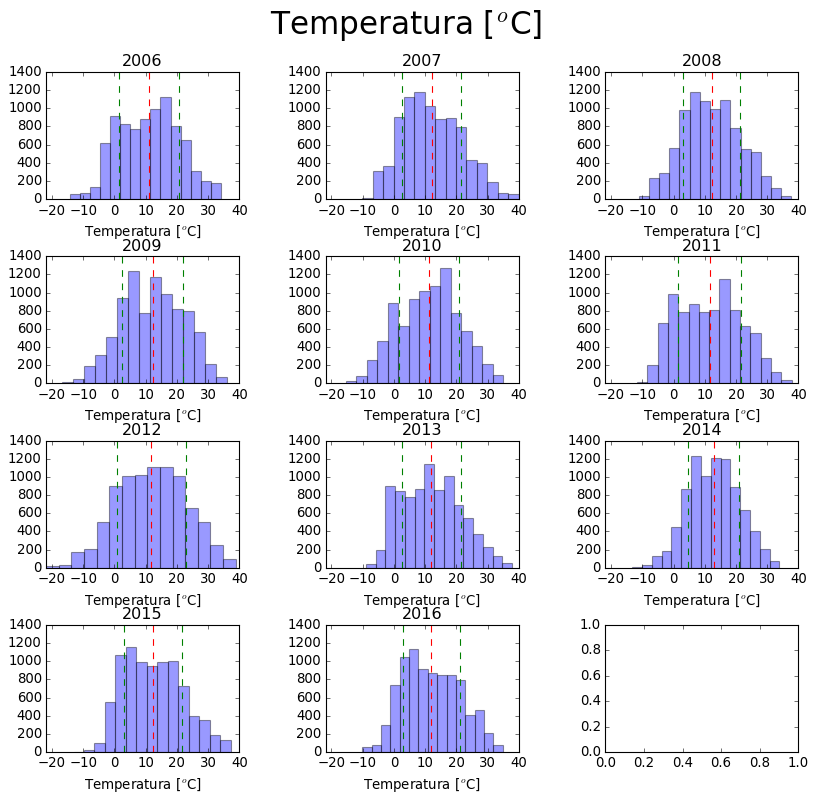

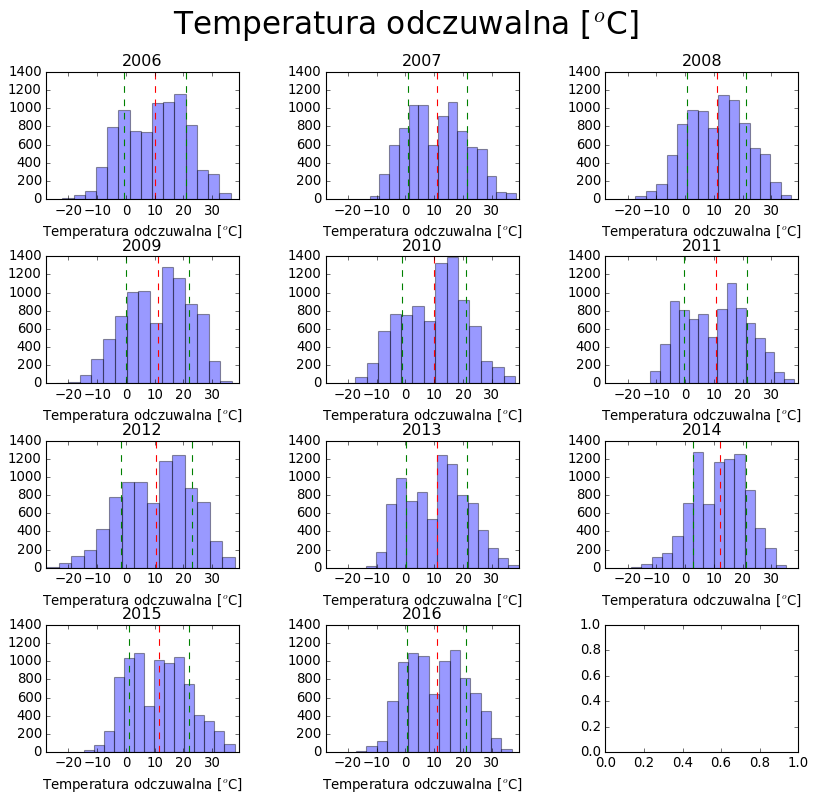

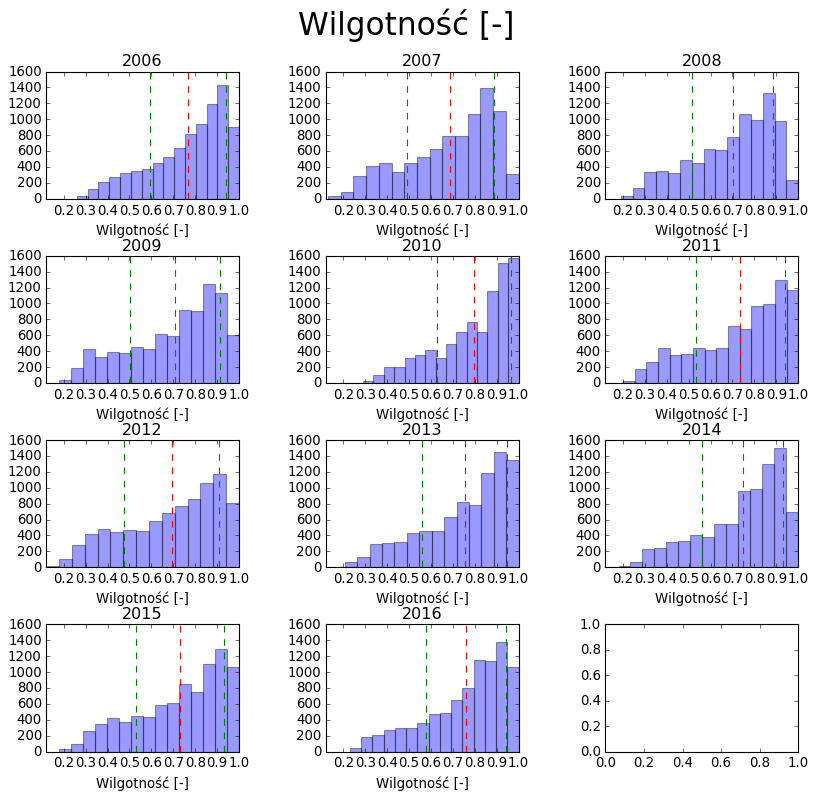

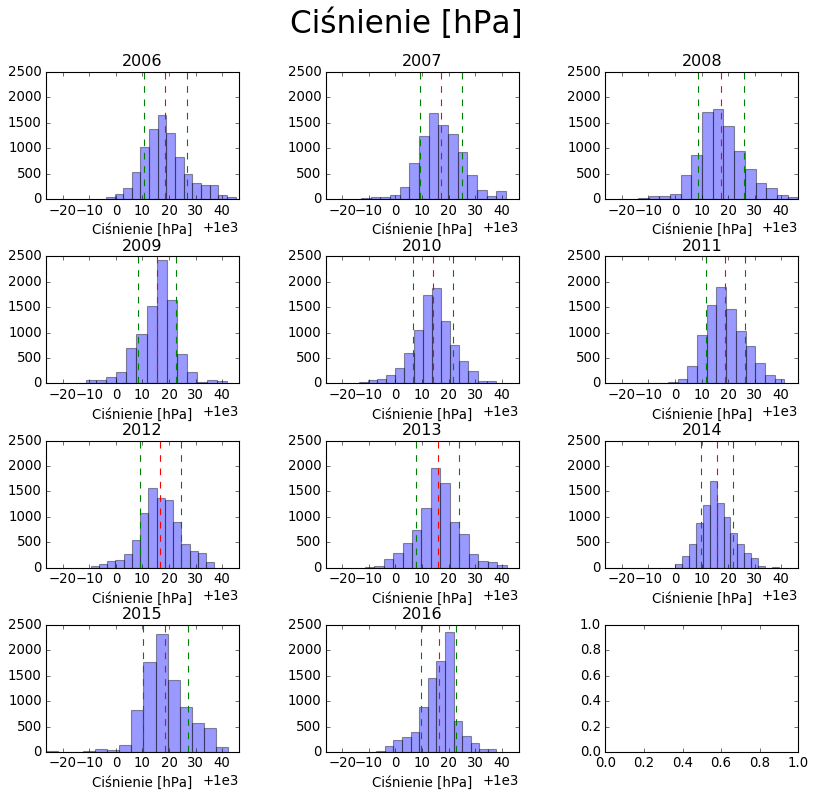

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')

params = ['Temperature', 'ApparentTemperature', 'Humidity', 'Pressure']
for counter, nameOfParam in enumerate(params):
    minValue = min(df[nameOfParam])
    maxValue = max(df[nameOfParam])
    nameDict = {'Temperature': 'Temperatura ['+ r'$^o$' + 'C]',\
    'ApparentTemperature':'Temperatura odczuwalna ['+r'$^o$' + 'C]',\
    'Humidity':'Wilgotność [-]','Pressure': 'Ciśnienie [hPa]'}


    # Podział na subploty
    fig = plt.subplots(4, 3,  dpi = 80, figsize = (10,10), facecolor = 'white')
    plt.suptitle(nameDict[nameOfParam], fontsize = 28)
    
    axes = []       # inicjalizacja listy axisów
    ymaxes = []     # inicjalizacja listy maksymalnych wartości na osi y

    for ax in range(11):
        axes.append(plt.subplot(4, 3, ax+1))
        axes[ax].set_title( str(2006 + ax))
        plt.sca(axes[ax])
        sns.distplot( df.loc[str(2006 + ax)].loc[:, nameOfParam] , bins = 15, kde = False)
        axes[ax].set_xlim(minValue,maxValue)
        ymaxes.append(axes[ax].get_ylim()[1])
        axes[ax].set_xlabel(nameDict[nameOfParam])

    for i,ax in enumerate(axes):
        ax.set_ylim(0,max(ymaxes))
        srednia = df.loc[str(2006+i)].loc[:,nameOfParam].mean()
        std = df.loc[str(2006+i)].loc[:,nameOfParam].std()
        ax.plot([srednia,srednia], [0, max(ymaxes)], '--', color = 'red', mew=20, ms=30)
        ax.plot([srednia+std,srednia+std], [0, max(ymaxes)], '--', color = 'green', mew=10, ms=20)
        ax.plot([srednia-std,srednia-std], [0, max(ymaxes)], '--', color = 'green', mew=10, ms=20)

    plt.subplots_adjust(left = 0.05, bottom = 0.05, right = 0.99, top = 0.9, wspace = 0.45, hspace = 0.45)
    
    



### Zależności między zmiennymi

Kolejną interesującą kwestią może być to, jaka zachodzi korelacja pomiędzy poszczególnymi zmiennymi. Im większa jest wartość bezwzględna współczynnika korelacji między dwoma parametrami, tym lepiej sprawdzą się one we wzajemnej predykcji. Innymi słowy jeśli współczynnik ten dla pewnych dwóch zmiennych będzie daleki od zera, prędzej można oczekiwać, że na podstawie jednej z nich można przewidzieć wartość drugiej (na przykład z wykorzystaniem regresji liniowej). Macierz współczynników korelacji została przedstawiona poniżej

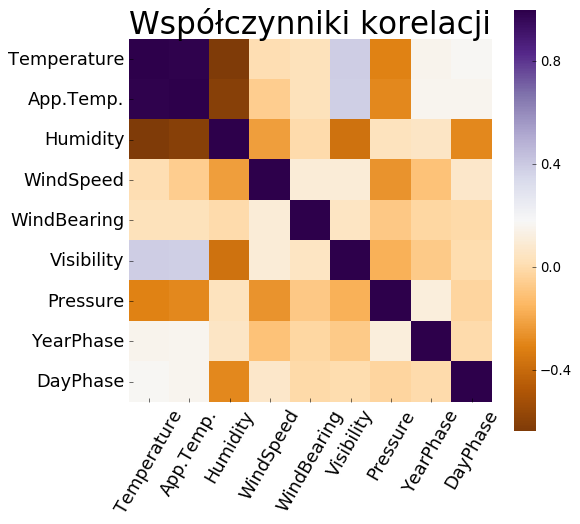

In [46]:
dfnum = df.select_dtypes([float])
labels = list(dfnum.columns)
labels[1] = 'App.Temp.'

fig = plt.figure(figsize=(7,7), facecolor = 'white')
ax = fig.add_subplot(111)
sns.heatmap(dfnum.corr(), cmap = 'PuOr', cbar_kws={'shrink': 0.8}, square = True)
plt.title('Współczynniki korelacji', fontsize = 28)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(labels, {'fontsize': 16})
ax.set_yticklabels(labels, {'fontsize': 16})
plt.xticks(rotation=60)
plt.subplots_adjust(left = 0.18, bottom = 0.05, right = 0.99, top = 0.99, wspace = 0.45, hspace = 0.45)


### Zmienność warunków pogodowych w ciągu dnia
   
   Ponieważ dysponujemy danymi z każdej godziny i każdego dnia roku dla kilku kolejnych lat pomyślałem, że ciekawie będzie zobaczyć na wykresie następującą zależność: jak w ciągu doby zmieniają się wartości poszczególnych parametrów pogodowych dla wybranych dni w ciągu roku (uśredniając po kilku latach). Innymi słowy chodzi o uśrednienie wartości dajmy na to temperatury po wszystkich kolejnych latach w – przykładowo – pierwszy dzień wiosny (z dopuszczalną tolerancją +/- kilka dni). Taką analizę przeprowadziłem dla: temperatury, wilgotności oraz ciśnienia w okolicach pierwszych dni kolejnych pór roku.

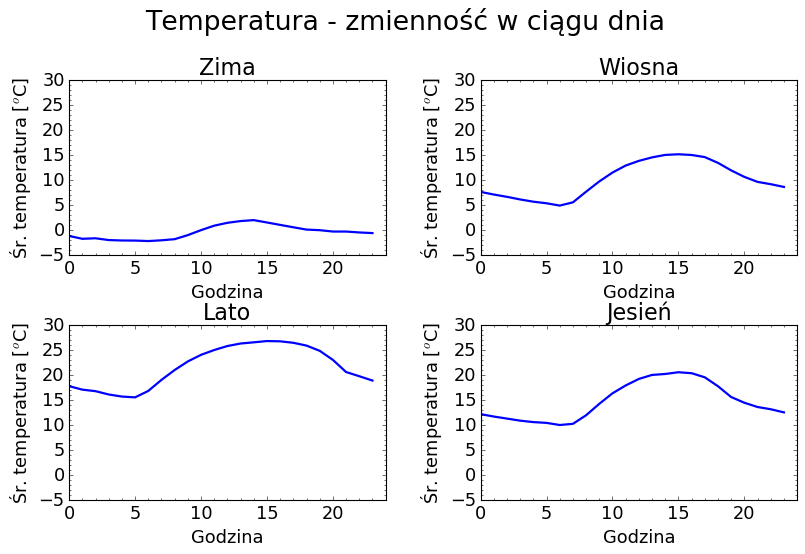

In [59]:
dfValuesPhases = df[['Temperature', 'YearPhase', 'DayPhase']]
nazwa = 'Temperatura'

pory = ['Zima', 'Wiosna', 'Lato', 'Jesień']
name = dfValuesPhases.columns[0]
nameDict = {'Temperature': 'temperatura ['+ r'$^o$' + 'C]', 'Pressure':'ciśnienie [hPa]',\
'Humidity':'wilgotność [-]'}
limDict = {'Temperature': [-5,30], 'Pressure':[1012, 1024], 'Humidity':[0.4, 1]}
meanValues = np.zeros([4,24])     # macierz średnich wartości o danej porze roku o danej godzinie

for i, pora in enumerate(pory):
    # dfseason to df zawierający dane jedynie z okolic pierwszych dni kolejnych pór roku (+-5 dni)
    dfseason = dfValuesPhases[(dfValuesPhases['YearPhase']<=i*np.pi/2+0.1) & (dfValuesPhases['YearPhase']>=i*np.pi/2-0.1)]

    for j, mT in enumerate(meanValues[i,:]):
        # df_mT zawiera te rekordy, które miały miejsce o danej godzinie wyrażonej w fazie dnia
        df_mV = dfseason[(dfseason['DayPhase'] <= j/24*2*np.pi+0.01) & (dfseason['DayPhase'] >= j/24*2*np.pi-0.01)]
        meanValues[i,j] = df_mV[name].mean()

# Robienie wykresu
fig = plt.figure(figsize = (10,7), facecolor = 'white')
axes = []
ymaxes = []
ymins = []

for sub in range(len(pory)):
    axes.append(fig.add_subplot(2,2,sub+1) )
    axes[sub].set_title(pory[sub], {'fontsize':20})
    axes[sub].plot(meanValues[sub,:], linewidth = 2)
    axes[sub].set_xlabel('Godzina', {'fontsize':16})
    axes[sub].set_ylabel('Śr. '+nameDict[name], {'fontsize':16})
    axes[sub].tick_params(axis='both', which='both', labelsize=16)
    axes[sub].yaxis.offsetText.set_fontsize(20)
    axes[sub].minorticks_on()
    axes[sub].set_xlim(0,24)
    ymaxes.append(max(meanValues[sub,:]))
    ymins.append(min(meanValues[sub,:]))

for ax in axes:
    ax.set_ylim( limDict[name] )


plt.suptitle(nazwa+' - zmienność w ciągu dnia', fontsize = 24)

plt.subplots_adjust(left = 0.08, bottom = 0.1, right = 0.99, top = 0.85, wspace = 0.3, hspace = 0.4)



Dla lepszego zobrazowania zmienności dziennego rozkładu temperatury w ciągu roku zakres osi *y* jest taki sam na wszystkich subplotach. Wyraźnie widać, że niezależnie od pory roku rozkład ten przypomina nieco sinusoidę – w trakcie pojedynczego okresu (czyli doby) występuje jedno maksimum i jedno minimum. Najniższa wartość temperatury przypada zwykle na okolice godziny 5-6 rano – co nie dziwi, ponieważ atmosfera miała już czas, żeby się wychłodzić o słońce jeszcze na dobre nie wzeszło. Im bliżej lata tym wcześniej występuje to minimum. Maksimum natomiast to okolice godziny 14-15.

Następnie przyjrzyjmy się wilgotności, która całkiem nieźle koreluje z temperaturą. Widać to zarówno na macierzy współczynników korelacji jak i na poniższym wykresie:

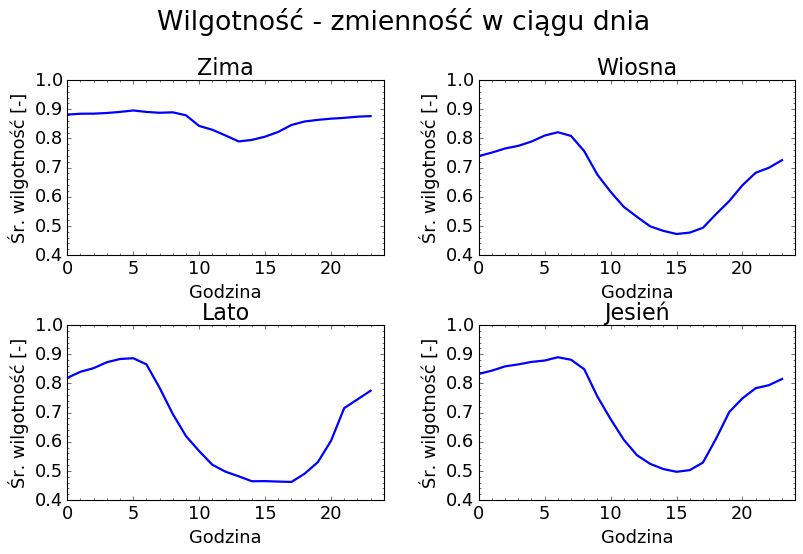

In [61]:
dfValuesPhases = df[['Humidity', 'YearPhase', 'DayPhase']]
nazwa = 'Wilgotność'

pory = ['Zima', 'Wiosna', 'Lato', 'Jesień']
name = dfValuesPhases.columns[0]
nameDict = {'Temperature': 'temperatura ['+ r'$^o$' + 'C]', 'Pressure':'ciśnienie [hPa]',\
'Humidity':'wilgotność [-]'}
limDict = {'Temperature': [-5,30], 'Pressure':[1012, 1024], 'Humidity':[0.4, 1]}
meanValues = np.zeros([4,24])     # macierz średnich wartości o danej porze roku o danej godzinie

for i, pora in enumerate(pory):
    # dfseason to df zawierający dane jedynie z okolic pierwszych dni kolejnych pór roku (+-5 dni)
    dfseason = dfValuesPhases[(dfValuesPhases['YearPhase']<=i*np.pi/2+0.1) & (dfValuesPhases['YearPhase']>=i*np.pi/2-0.1)]

    for j, mT in enumerate(meanValues[i,:]):
        # df_mT zawiera te rekordy, które miały miejsce o danej godzinie wyrażonej w fazie dnia
        df_mV = dfseason[(dfseason['DayPhase'] <= j/24*2*np.pi+0.01) & (dfseason['DayPhase'] >= j/24*2*np.pi-0.01)]
        meanValues[i,j] = df_mV[name].mean()

# Robienie wykresu
fig = plt.figure(figsize = (10,7), facecolor = 'white')
axes = []
ymaxes = []
ymins = []

for sub in range(len(pory)):
    axes.append(fig.add_subplot(2,2,sub+1) )
    axes[sub].set_title(pory[sub], {'fontsize':20})
    axes[sub].plot(meanValues[sub,:], linewidth = 2)
    axes[sub].set_xlabel('Godzina', {'fontsize':16})
    axes[sub].set_ylabel('Śr. '+nameDict[name], {'fontsize':16})
    axes[sub].tick_params(axis='both', which='both', labelsize=16)
    axes[sub].yaxis.offsetText.set_fontsize(20)
    axes[sub].minorticks_on()
    axes[sub].set_xlim(0,24)
    ymaxes.append(max(meanValues[sub,:]))
    ymins.append(min(meanValues[sub,:]))

for ax in axes:
    ax.set_ylim( limDict[name] )


plt.suptitle(nazwa+' - zmienność w ciągu dnia', fontsize = 24)

plt.subplots_adjust(left = 0.08, bottom = 0.1, right = 0.99, top = 0.85, wspace = 0.3, hspace = 0.4)

Tutaj również mamy do czynienia z trochę upośledzoną sinusoidą – a może z cosinusoidą! Wykres jest przecież przesunięty w fazie o $\pi/2$ . Powinna więc zachodzić korelacja ujemna, bo tam gdzie temperatura rośnie tam wilgotność spada. Rzut oka na wspomnianą macierz i okazuje się, że właśnie tak jest!

A jak to wygląda w przypadku ciśnienia? Zobaczmy…

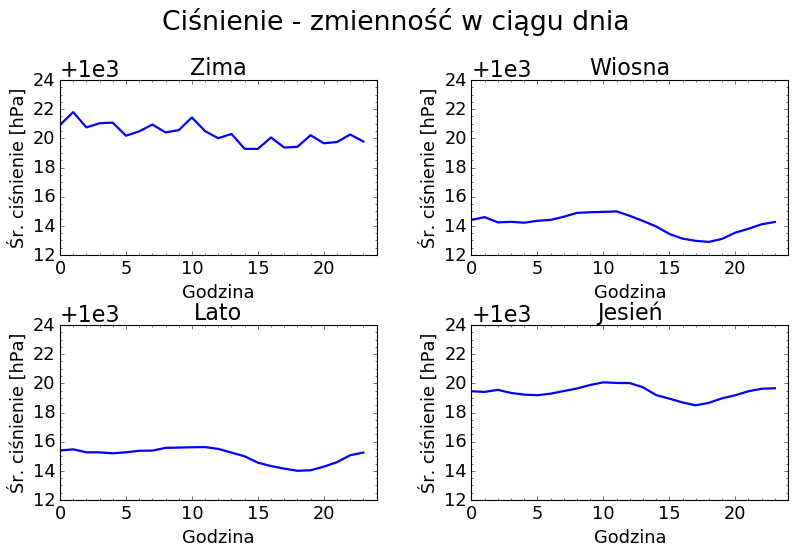

In [62]:
dfValuesPhases = df[['Pressure', 'YearPhase', 'DayPhase']]
nazwa = 'Ciśnienie'

pory = ['Zima', 'Wiosna', 'Lato', 'Jesień']
name = dfValuesPhases.columns[0]
nameDict = {'Temperature': 'temperatura ['+ r'$^o$' + 'C]', 'Pressure':'ciśnienie [hPa]',\
'Humidity':'wilgotność [-]'}
limDict = {'Temperature': [-5,30], 'Pressure':[1012, 1024], 'Humidity':[0.4, 1]}
meanValues = np.zeros([4,24])     # macierz średnich wartości o danej porze roku o danej godzinie

for i, pora in enumerate(pory):
    # dfseason to df zawierający dane jedynie z okolic pierwszych dni kolejnych pór roku (+-5 dni)
    dfseason = dfValuesPhases[(dfValuesPhases['YearPhase']<=i*np.pi/2+0.1) & (dfValuesPhases['YearPhase']>=i*np.pi/2-0.1)]

    for j, mT in enumerate(meanValues[i,:]):
        # df_mT zawiera te rekordy, które miały miejsce o danej godzinie wyrażonej w fazie dnia
        df_mV = dfseason[(dfseason['DayPhase'] <= j/24*2*np.pi+0.01) & (dfseason['DayPhase'] >= j/24*2*np.pi-0.01)]
        meanValues[i,j] = df_mV[name].mean()

# Robienie wykresu
fig = plt.figure(figsize = (10,7), facecolor = 'white')
axes = []
ymaxes = []
ymins = []

for sub in range(len(pory)):
    axes.append(fig.add_subplot(2,2,sub+1) )
    axes[sub].set_title(pory[sub], {'fontsize':20})
    axes[sub].plot(meanValues[sub,:], linewidth = 2)
    axes[sub].set_xlabel('Godzina', {'fontsize':16})
    axes[sub].set_ylabel('Śr. '+nameDict[name], {'fontsize':16})
    axes[sub].tick_params(axis='both', which='both', labelsize=16)
    axes[sub].yaxis.offsetText.set_fontsize(20)
    axes[sub].minorticks_on()
    axes[sub].set_xlim(0,24)
    ymaxes.append(max(meanValues[sub,:]))
    ymins.append(min(meanValues[sub,:]))

for ax in axes:
    ax.set_ylim( limDict[name] )


plt.suptitle(nazwa+' - zmienność w ciągu dnia', fontsize = 24)

plt.subplots_adjust(left = 0.08, bottom = 0.1, right = 0.99, top = 0.85, wspace = 0.3, hspace = 0.4)

Tutaj również występuje dobowa zmienność, ale można doszukać się nie jednego a dwóch cykli, z czego jeden charakteryzuje się niższym minimum lokalnym niż drugi. Wyjątkiem jest zima – tutaj skoki i spadki ciśnienia zdarzają się praktycznie co godzinę. Wydaje się to bardzo ciekawe, tym bardziej, że dane nie zostały wzięte z tylko jednego dnia – który mógł być z jakiegoś powodu wyjątkowo anomalny – a zostały uśrednione po 11 latach, z czego w każdym roku wziętych pod uwagę było około 10 kolejnych dni. Widać również, że ciśnienie najniższe jest latem – około 1015 hPa – a najwyższe zimą – około 1020 hPa.

### Wykorzystanie regresji liniowej do estymacji wartości temperatury na podstawie pozostałych danych
   
   Ze względu na to, że w tym zbiorze danych jest dużo zmiennych numerycznych o rozkładzie ciągłym, można pokusić się o wykorzystanie metody regresji liniowej. Co prawda ciężko spodziewać się, żeby coś tak nieliniowego jak zjawiska pogodowe dało się przewidzieć z wykorzystaniem tak prostego narzędzia. Jednakże moim celem nie jest w tym przypadku stworzenie dokładnego i niezawodnego modelu predykcyjnego a jedynie przetestowanie w celach dydaktycznych metody regresji liniowej z wykorzystaniem biblioteki scikit-learn oraz przy okazji omówienie jak ta metoda działa. W związku z tym zacznę od krótkiego matematycznego wprowadzenia po czym przedstawię uzyskane wyniki.

   Regresja liniowa działa na nieco podobnej zasadzie co regresja logistyczna, którą opisałem w poprzednim wpisie. Sprowadza się do znalezienia pewnej funkcji, która jako argument przyjmuje wektor liczb, czyli wartości zmiennych określających (ficzerów, cech) – tych, na podstawie których chcemy dokonać predykcji zmiennej określanej (targetu). W przypadku tej metody szukana funkcja ma prostą, liniową postać:
   
$$y = f(\vec x) = a_{\text{0}} + a_{\text{1}}\cdot x_{\text{1}} + a_{\text{2}}\cdot x_{\text{2}} \cdot ...$$

gdzie $y$ to wartość zmiennej określanej, $\vec x  =(x_{\text{1}}, x_{\text{2}}, ...)$ to wektor zmiennych określających a $\vec a = (a_{\text{0}}, a_{\text{1}}, a_{\text{2}}, ...)$ to wektor współczynników, których wartości zostaną znalezione na drodze uczenia. Oczywiście funkcja ta nie zwróci dokładnej wartości zmiennej określanej (chyba, że będzie ona istotnie wyrażona takim liniowym wzorem), ale zwrócona wartość będzie charakteryzowała się minimalnym błędem jaki możemy uzyskać jeśli chcemy przedstawić zmienną określaną jako kombinację liniową zmiennych określających.

Uczenie polega na takim dobraniu współczynników $a_i$ żeby - dla danych uczących - suma kwadratów różnic między wartością rzeczywistą i tą wyliczoną ze wzoru była możliwie najmniejsza.  Teraz dla przykładu pokażę kilka modeli predykcyjnych, które zróżnicowałem pod kątem dobrania ficzerów i targetu.

### 1. Przewidywanie temperatury na podstawie pozostałych zmiennych numerycznych
   
   Zacznę od próby określenia wartości temperatury na podstawie pozostałych zmiennych numerycznych - wszystkich oprócz temperatury odczuwalnej, dlatego że jej korelacja z temperaturą jest na tyle duża, że wagi pozostałych zmiennych - wyrażone przez współczyniki  $a_i$ byłyby znikomo małe i w praktyce badalibyśmy zależność między zwykłą temperaturą a tą odczuwalną. Dataset dzielę na podzbiór trenujący oraz testowy w  stosunku 0.67-0.33. Napisany w tym celu kod - tak jak jego całą resztę - znaleźć można na GitHubie.
   
 Jeśli predykcja byłaby całkowicie dokładna to na wykresie, który na swojej osi $ x$ miałby przewidywane wartości temperatury a na osi $ y $ wartości rzeczywiste wszystkie wyniki z podzbioru testowego powinny ułożyć się wzdłuż prostej $ y = x $. Im bardziej poszczególne punkty znajdują się poza tą prostą - tym bardziej niedokładny jest model. Zobaczmy więc jaką dokładność udało się uzyskać:

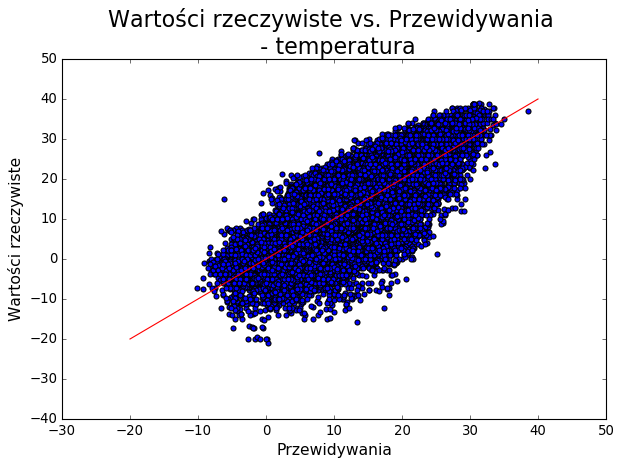

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dfnum.drop(['ApparentTemperature','Temperature'], axis = 1)
y = dfnum['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)

plt.style.use('classic')

y_predictions = lm.predict(X_test)

tytul = 'temperatura'

fig = plt.figure(facecolor = 'white')
plt.scatter(y_predictions, y_test)
plt.plot([-20,40],[-20,40],'r')
plt.title('Wartości rzeczywiste vs. Przewidywania \n - '+tytul, fontsize = 20)
plt.xlabel('Przewidywania', fontsize = 14)
plt.ylabel('Wartości rzeczywiste', fontsize = 14)
plt.xlim(-30,50)
plt.ylim(-40,50)
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.95, top = 0.85, wspace = 0.4, hspace = 0.35)

Każdy punkt na tym wykresie dany jest przez dwie współrzędne - przewidywaną wartość temperatury (na podstawie ficzerów w danym rekordzie) oraz tę, która rzeczywiście została wtedy zmierzona.  Te punkty, które znajdują się na czerwonej linii zostały idealnie dopasowane. Im dalej od niej - tym większy błąd predykcji. Niedokładność modelu można wyrazić liczbowo na kilka sposobów. Jednym z nich jest średni błąd bezwzględny (ang. mean absolute error - MAE). Wyraża się go następującym wzorem:

 $$ MAE = \frac{1}{n} \cdot \Sigma |y_i - \hat y_i |$$

gdzie $n$ to liczba punktów, $y_i$ to pojedyncza wartość przewidywana a $\hat y_i $ to odpowiadająca jej poprawna wartość. MAE to po prostu średnia różnica między tymi dwiema wartościami. Można dodatkowo podzielić MAE przez średnią rzeczywistych temperatur dla wszystkich tych punktów co będzie stanowić miarę błędu względnego. Jeśli dodatkowo przemnożymy wynik przez 100% otrzymamy metrykę zwaną średnim procentowym błędem bezwzględnym (ang. mean percentage absolute error - MPAE). Wbrew pozorom stwarzanym  przez nazwę jest to miara błędu względnego. W tym przypadku:

Średni błąd (MAE): 4.9012...

Średni błąd względny (MPAE): 0.4120...

A więc przeciętna odchyłka wartości przewidywanej od rzeczywistej to nieco ponad 40% średniej! Całkiem sporo. Przejdźmy teraz do drugiego modelu.

### 2. Przewidywanie temperatury odczuwalnej na podstawie pozostałych zmiennych numerycznych
   
   W następnej kolejności pokażę podobny model, ale przewidujący temperaturę odczuwalną. Może ona będzie łatwiejsza do określenia na podstawie pozostałych warunków atmosferycznych?

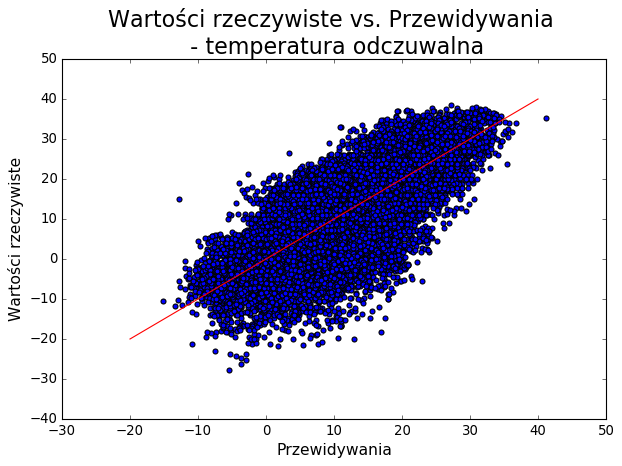

In [68]:
X = dfnum.drop(['ApparentTemperature','Temperature'], axis = 1)
y = dfnum['ApparentTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)

plt.style.use('classic')

y_predictions = lm.predict(X_test)

tytul = 'temperatura odczuwalna'

fig = plt.figure(facecolor = 'white')
plt.scatter(y_predictions, y_test)
plt.plot([-20,40],[-20,40],'r')
plt.title('Wartości rzeczywiste vs. Przewidywania \n - '+tytul, fontsize = 20)
plt.xlabel('Przewidywania', fontsize = 14)
plt.ylabel('Wartości rzeczywiste', fontsize = 14)
plt.xlim(-30,50)
plt.ylim(-40,50)
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.95, top = 0.85, wspace = 0.4, hspace = 0.35)

Cóż, z wykresu można wywnioskować, że niekoniecznie. Punkty są rozłożone nawet trochę szerzej. Błędy przedstawiają się tutaj następująco:

Średni błąd (MAE): 5.5866...

Średni błąd względny (MPAE): 0.5164...

Inne porównanie z pierwszym modelem można zobaczyć używając jako zmiennej określającej tylko jednego parametru. Najbardziej zauważalna współzależność zachodzi między temperaturą a wilgotnością, więc to ona zostanie wykorzystana do przeprowadzenia predykcji.

### 3. Przewidywanie temperatury na podstawie jedynie wilgotności
    
  Ponieważ tym razem w regresji liniowej wykorzystana zostanie tylko jedna zmienna, to otrzymamy następujący wzór:

 $$ T = a_{\text{0}} + a_{\text{1}}\cdot x$$

gdzie $T$ oznacza temperaturę a $x$ wilgotność. Ciężko oczekiwać sukcesów z punktu widzenia dokładności predykcji, ale myślę, że ciekawie będzie zobaczyć rezultaty.

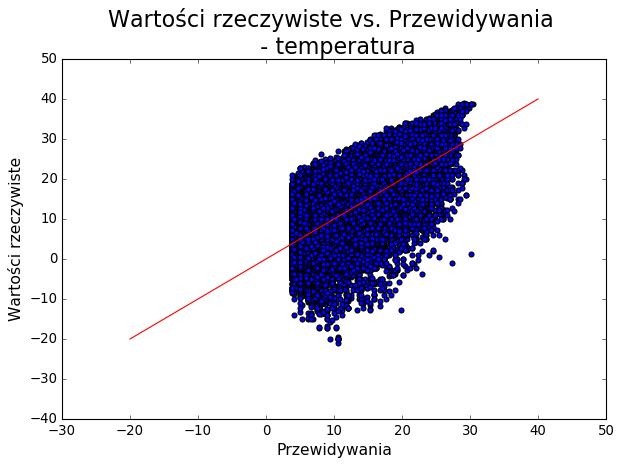

In [69]:
X = dfnum[['Humidity']]
y = dfnum['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
lm = LinearRegression()
lm.fit(X_train, y_train)

plt.style.use('classic')

y_predictions = lm.predict(X_test)

tytul = 'temperatura'

fig = plt.figure(facecolor = 'white')
plt.scatter(y_predictions, y_test)
plt.plot([-20,40],[-20,40],'r')
plt.title('Wartości rzeczywiste vs. Przewidywania \n - '+tytul, fontsize = 20)
plt.xlabel('Przewidywania', fontsize = 14)
plt.ylabel('Wartości rzeczywiste', fontsize = 14)
plt.xlim(-30,50)
plt.ylim(-40,50)
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.95, top = 0.85, wspace = 0.4, hspace = 0.35)

Zgodnie z przewidywaniami wyniki nie są zachwycające i mogą służyć jako anty-przykład tego jak wykorzystywać tę metodę. Co ciekawe - w przypadku regresji logistycznej nie miało dla rezultatów dużego znaczenia czy zbiór zmiennych określających zawierał wszystkie dostępne dane czy ograniczał się do tych najbardziej korelujących z targetem. Tutaj jest inaczej - ograniczając się do jednej zmiennej (nawet tej najbardziej korelującej ze zmienną określaną) pogarszamy wyniki. Jednak nie musi być to koniecznie cecha regresji liniowej a jedynie tych konkretnych przykładów.

Od razu rzuca się w oczy "ściana" po lewej stronie. Da się ją łatwo wytłumaczyć. Wynika  ona z tego, że - zaznaczona na osi poziomej - temperatura przewidywana ma pewną minimalną wartość, poniżej której nie schodzi (stąd "ściana"). Z kolei ta minimalna wartość temperatury powiązana jest z maksymalną wilgotnością jaka jest obserwowana w tej populacji (około 0.9 jak widać na jednym z poprzednich wykresów). Ponieważ wilgotność praktycznie nie przekracza 0.9, to temperatura - która na ogół maleje ze wzrostem wilgotności - nie może spadać poniżej pewnej wartości. Rzecz jasna tylko w sytuacji kiedy założymy, że temperatura jest liniową funkcją wilgotności a to założenie jest wysoce niewłaściwe i wynikają z niego błędy w predykcji.

### Podsumowanie

Analiza tego datasetu była interesująca głównie dlatego, że pozwoliła zaobserwować zmienność warunków pogodowych na całkiem długim przedziale czasu. Nie było to oczywiście na tyle dużo by dało się zaobserwować ewentualne zmiany klimatyczne, ale same dobowe wahania (uśrednione po tych wszystkich latach) wyglądają ciekawie. Z punktu widzenia wykorzystania regresji liniowej dane te były całkiem wygodne ze względu na dużą ilość zmiennych numerycznych, ale - zgodnie z przewidywaniami - tak prosta metoda nie może znaleźć zastosowania w predykcji jednych elementów pogody na podstawie innych. Może wrócę kiedyś do tych danych uzbrojony w lepsze narzędzia, ale w kilku najbliższych wpisach chciałbym skupić się na metodach klasyfikacji i klasteryzacji wykorzystywanych w uczeniu maszynowym. Będzie więc mniej wizualizacji rozkładów zmiennych i korelacji między nimi a więcej typowego *machine learningu*.